# import library

In [1]:
import warnings
warnings.filterwarnings("ignore")

In [2]:
#import necessary libraries
import os
import numpy as np
from pathlib import Path
from glob import glob
import random
import cv2
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

from sklearn.model_selection import train_test_split
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Flatten, Conv2D, MaxPooling2D, Dropout,Activation
from sklearn.metrics import accuracy_score,classification_report,confusion_matrix
from PIL import Image
from pylab import *
from PIL import Image, ImageChops, ImageEnhance

# Data Loading & Data Visualization

## Data Loading

In [3]:
real_images = os.listdir("Data/Real/")
fake_images = os.listdir("Data/Fake/")

In [4]:
print(len(real_images))

800


In [5]:
print(len(fake_images))

921


## Data size comparison of Real and Fake images using pie-chart

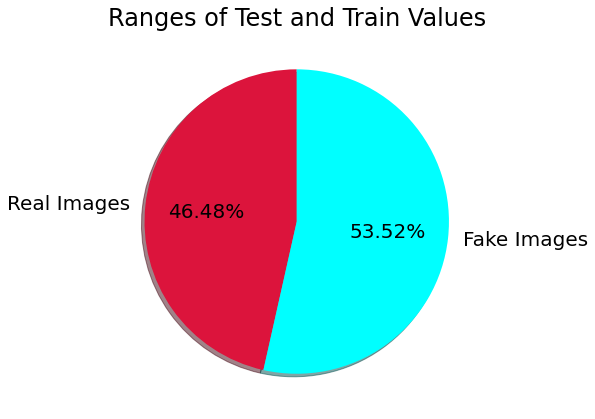

In [6]:
plt.figure(figsize=(10,7))
plt.rcParams["font.size"] = 20
labels=['Real Images','Fake Images']
data = [len(real_images),len(fake_images)]
plt.pie(x=data,labels=labels, autopct='%1.2f%%', shadow=True, startangle=90, colors=["crimson","aqua"])
plt.title("Ranges of Test and Train Values")
plt.show()

## Data size comparison of Real and Fake images using bar-chart

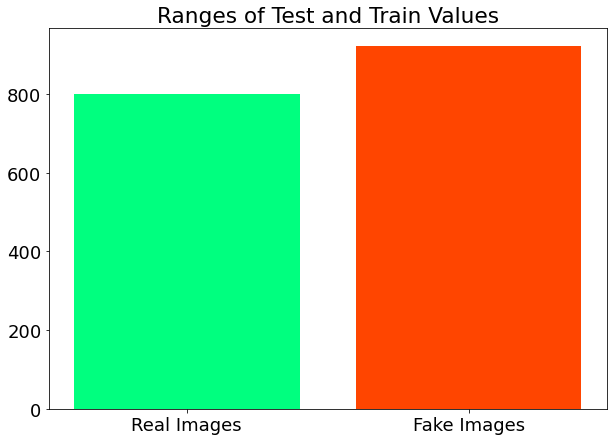

In [7]:
plt.figure(figsize=(10,7))
labels=['Real Images','Fake Images']
data = [len(real_images),len(fake_images)]
plt.rcParams["font.size"] = 18
plt.bar(x=labels,height=data,color=["springgreen","orangered"])
plt.title("Ranges of Test and Train Values")
plt.show()

## Randomly Visualizing Fake and Real Images from our Dataset

In [8]:
from random import sample

In [9]:
RealImages = glob("Data/Real/**")
def plot_real_images():
    r = sample(RealImages, 9)
    plt.figure(figsize=(20,20))
    plt.subplot(331)
    img_1=cv2.imread(r[0])
    img_1 = cv2.cvtColor(img_1,cv2.COLOR_BGR2RGB)
    plt.imshow(img_1); plt.axis('off')
    plt.subplot(332)
    img_2=cv2.imread(r[1])
    img_2 = cv2.cvtColor(img_2,cv2.COLOR_BGR2RGB)
    plt.imshow(img_2); plt.axis('off')
    plt.subplot(333)
    img_3=cv2.imread(r[2])
    img_3 = cv2.cvtColor(img_3,cv2.COLOR_BGR2RGB)
    plt.imshow(img_3); plt.axis('off')
    plt.subplot(334)
    img_4=cv2.imread(r[3])
    img_4 = cv2.cvtColor(img_4,cv2.COLOR_BGR2RGB)
    plt.imshow(img_4); plt.axis('off')
    plt.subplot(335)
    img_5 = cv2.imread(r[4])
    img_5 = cv2.cvtColor(img_5,cv2.COLOR_BGR2RGB)
    plt.imshow(img_5); plt.axis('off')
    plt.subplot(336)
    img_6 = cv2.imread(r[5])
    img_6 = cv2.cvtColor(img_6,cv2.COLOR_BGR2RGB)
    plt.imshow(img_6); plt.axis('off')
    plt.subplot(337)
    img_7=cv2.imread(r[6])
    img_7 = cv2.cvtColor(img_7,cv2.COLOR_BGR2RGB)
    plt.imshow(img_7); plt.axis('off')
    plt.subplot(338)
    img_8=cv2.imread(r[7])
    img_8 = cv2.cvtColor(img_8,cv2.COLOR_BGR2RGB)
    plt.imshow(img_8); plt.axis('off')
    plt.subplot(339)
    img_9=cv2.imread(r[8])
    img_9 = cv2.cvtColor(img_9,cv2.COLOR_BGR2RGB)
    plt.imshow(img_9); plt.axis('off')
    

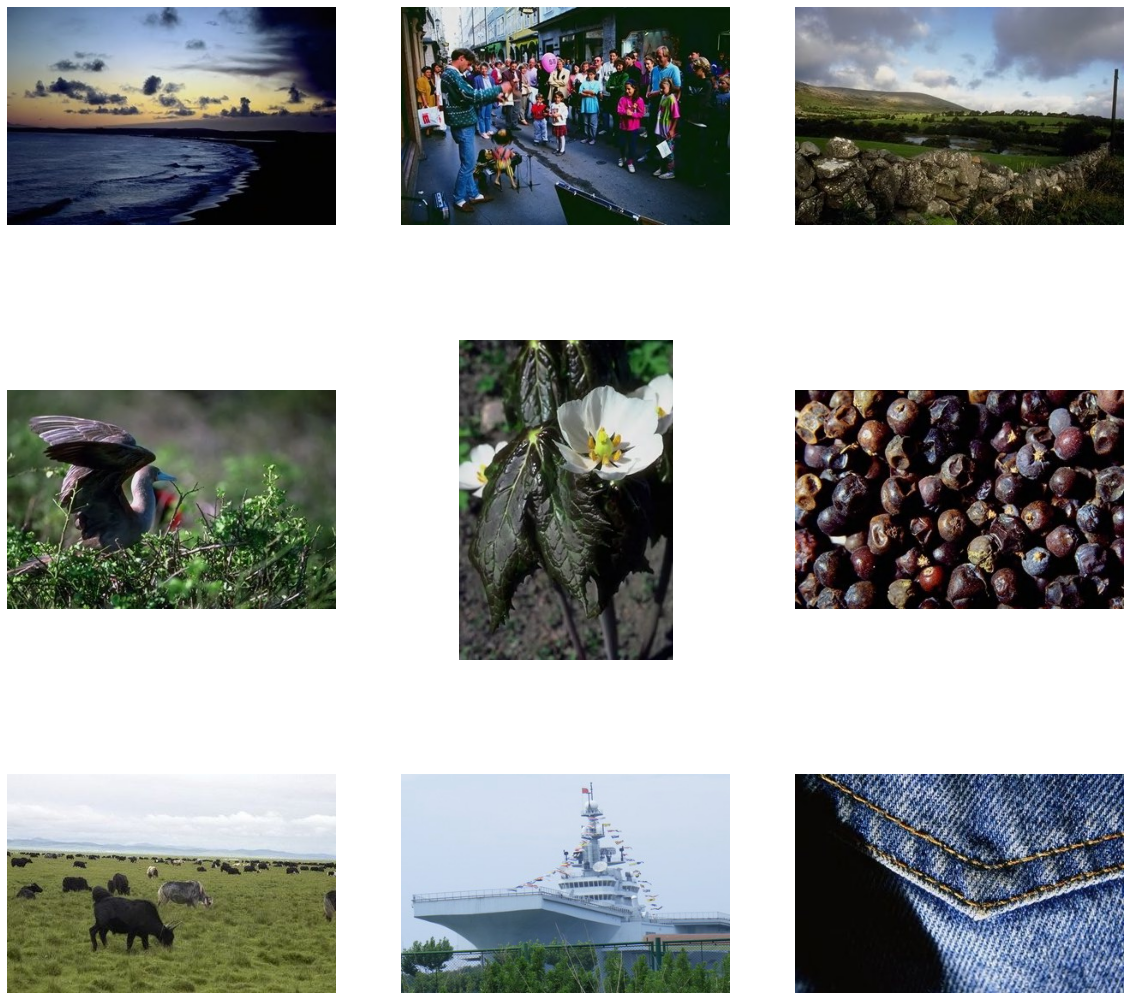

In [10]:
plot_real_images()

In [11]:
FakeImages = glob("Data/Fake/**")
def plot_fake_images():
    r = sample(FakeImages, 9)
    plt.figure(figsize=(20,20))
    plt.subplot(331)
    img_1=cv2.imread(r[0])
    img_1 = cv2.cvtColor(img_1,cv2.COLOR_BGR2RGB)
    plt.imshow(img_1); plt.axis('off')
    plt.subplot(332)
    img_2=cv2.imread(r[1])
    img_2 = cv2.cvtColor(img_2,cv2.COLOR_BGR2RGB)
    plt.imshow(img_2); plt.axis('off')
    plt.subplot(333)
    img_3=cv2.imread(r[2])
    img_3 = cv2.cvtColor(img_3,cv2.COLOR_BGR2RGB)
    plt.imshow(img_3); plt.axis('off')
    plt.subplot(334)
    img_4=cv2.imread(r[3])
    img_4 = cv2.cvtColor(img_4,cv2.COLOR_BGR2RGB)
    plt.imshow(img_4); plt.axis('off')
    plt.subplot(335)
    img_5 = cv2.imread(r[4])
    img_5 = cv2.cvtColor(img_5,cv2.COLOR_BGR2RGB)
    plt.imshow(img_5); plt.axis('off')
    plt.subplot(336)
    img_6 = cv2.imread(r[5])
    img_6 = cv2.cvtColor(img_6,cv2.COLOR_BGR2RGB)
    plt.imshow(img_6); plt.axis('off')
    plt.subplot(337)
    img_7=cv2.imread(r[6])
    img_7 = cv2.cvtColor(img_7,cv2.COLOR_BGR2RGB)
    plt.imshow(img_7); plt.axis('off')
    plt.subplot(338)
    img_8=cv2.imread(r[7])
    img_8 = cv2.cvtColor(img_8,cv2.COLOR_BGR2RGB)
    plt.imshow(img_8); plt.axis('off')
    plt.subplot(339)
    img_9=cv2.imread(r[8])
    img_9 = cv2.cvtColor(img_9,cv2.COLOR_BGR2RGB)
    plt.imshow(img_9); plt.axis('off')
    

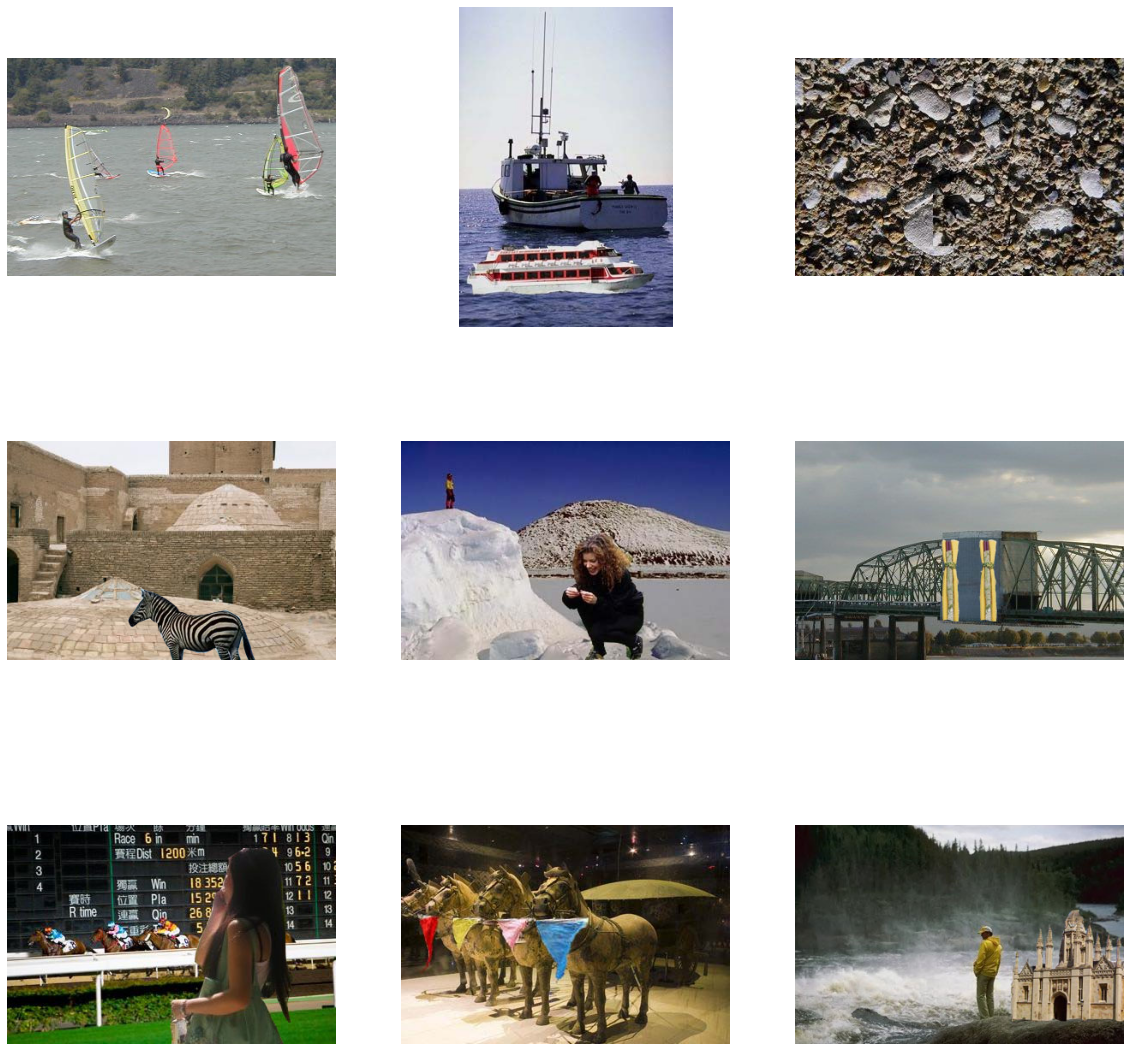

In [12]:
plot_fake_images()

# Apply Error Leavel Analysis

In [13]:
def convert_to_ela_image(path, quality):
    temp_filename = 'temp_file_name.jpg'
    ela_filename = 'temp_ela.png'
    
    image = Image.open(path).convert('RGB')
    image.save(temp_filename, 'JPEG', quality = quality)
    temp_image = Image.open(temp_filename)
    
    ela_image = ImageChops.difference(image, temp_image)
    
    extrema = ela_image.getextrema()
    max_diff = max([ex[1] for ex in extrema])
    if max_diff == 0:
        max_diff = 1
    scale = 255.0 / max_diff
    
    ela_image = ImageEnhance.Brightness(ela_image).enhance(scale)
    
    return ela_image

In [14]:
image_size = (256, 256)

## prepare_Image
### 1) convert to ELA Images
### 2) image resizing
### 3) normalization

In [15]:
def prepare_image(image_path):
    return np.array(convert_to_ela_image(image_path, 90).resize(image_size)).flatten() / 255.0

# We are doing ELA for Real Images

In [16]:
X = [] # ELA converted images
Y = [] # 0 for fake, 1 for real

In [17]:
path = 'data/real/'
for dirname, _, filenames in os.walk(path):
    for filename in filenames:
        if filename.endswith('.jpg') or filename.endswith('.png'):
            try:
                full_path = os.path.join(dirname, filename)
                X.append(prepare_image(full_path))
                Y.append(1)
            except:
                pass
print(len(X), len(Y))

790 790


In [18]:
print(Y)

[1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 

# Applying ELA for Fake images

In [19]:
path = 'data/fake/'
for dirname, _, filenames in os.walk(path):
    for filename in filenames:
        if filename.endswith('.jpg') or filename.endswith('.png'):
            full_path = os.path.join(dirname, filename)
            X.append(prepare_image(full_path))
            Y.append(0)

print(len(X), len(Y))

1711 1711


In [20]:
print(Y)

[1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 

In [21]:
X = np.array(X)

In [22]:
np.shape(X)

(1711, 196608)

In [23]:
X = X.reshape(-1, 256, 256, 3)

In [24]:
X.shape

(1711, 256, 256, 3)

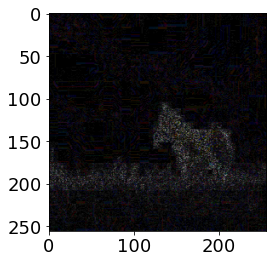

In [25]:
plt.imshow(X[0])
plt.show()

In [26]:
Y = to_categorical(Y, 2)

# Split data into Train and Test

In [27]:
X_train, X_val, Y_train, Y_val = train_test_split(X, Y, test_size = 0.2, random_state=5)

In [28]:
print(len(X_train), len(Y_train))
print(len(X_val), len(Y_val))

1368 1368
343 343


In [29]:
print(X_train.shape,X_val.shape,Y_train.shape,Y_val.shape)

(1368, 256, 256, 3) (343, 256, 256, 3) (1368, 2) (343, 2)


# Build the Model

In [30]:
model=Sequential()

model.add(Conv2D(100,(3,3),input_shape=X_train.shape[1:]))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(Dropout(0.2))

model.add(Conv2D(100,(3,3)))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(Dropout(0.1))

model.add(Flatten())
model.add(Dense(50,activation='relu'))
model.add(Dense(2,activation='sigmoid'))

In [31]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 254, 254, 100)     2800      
                                                                 
 activation (Activation)     (None, 254, 254, 100)     0         
                                                                 
 max_pooling2d (MaxPooling2D  (None, 127, 127, 100)    0         
 )                                                               
                                                                 
 dropout (Dropout)           (None, 127, 127, 100)     0         
                                                                 
 conv2d_1 (Conv2D)           (None, 125, 125, 100)     90100     
                                                                 
 activation_1 (Activation)   (None, 125, 125, 100)     0         
                                                        

In [32]:
model.compile(loss='binary_crossentropy',optimizer='adam',metrics=['accuracy'])

# Train the model

In [33]:
history = model.fit(x=X_train,y=Y_train,batch_size = 64,epochs = 20)

Epoch 1/20
22/22 [==============================] - 375s 16s/step - loss: 0.8539 - accuracy: 0.5146
Epoch 2/20
22/22 [==============================] - 325s 15s/step - loss: 0.5888 - accuracy: 0.6082
Epoch 3/20
22/22 [==============================] - 325s 15s/step - loss: 0.5504 - accuracy: 0.7222
Epoch 4/20
22/22 [==============================] - 309s 14s/step - loss: 0.5081 - accuracy: 0.7580
Epoch 5/20
22/22 [==============================] - 282s 13s/step - loss: 0.4803 - accuracy: 0.7632
Epoch 6/20
22/22 [==============================] - 283s 13s/step - loss: 0.4398 - accuracy: 0.7946
Epoch 7/20
22/22 [==============================] - 283s 13s/step - loss: 0.4081 - accuracy: 0.8019
Epoch 8/20
22/22 [==============================] - 284s 13s/step - loss: 0.3903 - accuracy: 0.8107
Epoch 9/20
22/22 [==============================] - 284s 13s/step - loss: 0.3833 - accuracy: 0.8048
Epoch 10/20
22/22 [==============================] - 285s 13s/step - loss: 0.3640 - accuracy: 0.8209

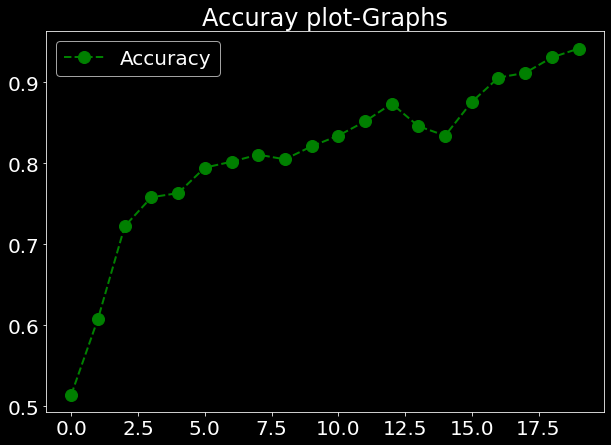

In [36]:
with plt.style.context('dark_background'):
    plt.figure(figsize=(10,7))
    plt.rcParams["font.size"]=20
    plt.plot(history.history["accuracy"],color='green', marker='o', linestyle='dashed',linewidth=2, markersize=12)
    plt.title("Accuray plot-Graphs")
    plt.legend(labels=["Accuracy"])
plt.show()

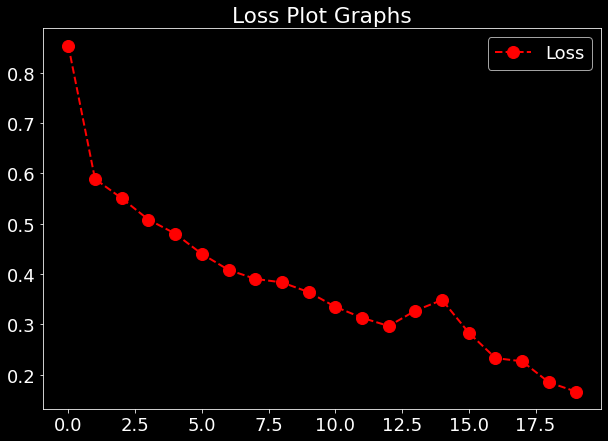

In [37]:
with plt.style.context('dark_background'):
    plt.figure(figsize=(10,7))
    plt.plot(history.history["loss"],color='red', marker='o', linestyle='dashed',linewidth=2, markersize=12)
    plt.title("Loss Plot Graphs")
    plt.legend(labels=["Loss"])
plt.show()

In [38]:
y_pred = model.predict(X_val)
pred = np.argmax(y_pred,axis=1)
actual = np.argmax(Y_val,axis=1)

In [39]:
print(y_pred)

[[6.39119267e-01 2.29702741e-01]
 [3.02591974e-09 1.00000000e+00]
 [1.84250712e-05 9.99991298e-01]
 [7.25690842e-01 1.79751784e-01]
 [1.81375835e-05 9.99890447e-01]
 [9.47791179e-08 1.00000000e+00]
 [5.71736157e-01 5.74314356e-01]
 [3.82480055e-01 6.53208375e-01]
 [9.87743020e-01 3.02794576e-03]
 [8.45427990e-01 1.04833722e-01]
 [6.41517282e-01 2.58424520e-01]
 [1.03965128e-07 1.00000000e+00]
 [4.05562907e-01 6.57717943e-01]
 [9.70716715e-01 3.06927860e-02]
 [7.17694044e-01 4.14671421e-01]
 [1.09535777e-05 9.99981046e-01]
 [8.71380448e-01 5.49225807e-02]
 [9.73984241e-01 1.06087327e-02]
 [7.21779048e-01 5.66807270e-01]
 [9.48292375e-01 3.99161577e-02]
 [8.54195595e-01 1.90609574e-01]
 [3.57819408e-01 5.04660308e-01]
 [5.79852641e-01 3.78073454e-01]
 [2.78222561e-03 9.88608241e-01]
 [8.45228988e-06 9.99997616e-01]
 [8.16889763e-01 9.07343030e-02]
 [5.53616583e-01 4.87696826e-01]
 [3.03076863e-01 8.06061506e-01]
 [9.79221404e-01 1.58612430e-02]
 [1.88735052e-11 1.00000000e+00]
 [9.869283

In [40]:
print(pred)

[0 1 1 0 1 1 1 1 0 0 0 1 1 0 0 1 0 0 0 0 0 1 0 1 1 0 0 1 0 1 0 0 1 0 1 1 1
 0 0 0 1 1 0 1 0 1 0 1 0 0 0 1 0 0 1 1 1 0 0 1 1 0 1 0 0 1 0 1 1 0 0 0 0 0
 0 0 0 1 1 0 1 0 0 0 1 0 0 0 1 1 0 0 0 1 0 1 0 1 0 0 1 0 0 0 1 1 0 0 1 1 1
 0 0 0 0 0 1 1 0 0 0 0 0 1 0 0 0 0 0 1 0 1 0 0 1 0 0 0 0 1 0 0 1 0 1 1 0 1
 1 0 0 1 1 0 1 0 0 0 1 1 1 0 0 0 0 1 0 1 0 0 0 0 1 0 0 1 1 0 1 0 1 0 0 0 0
 1 0 1 1 1 1 1 1 1 1 0 0 0 1 1 0 0 0 0 1 1 1 1 1 1 1 1 0 0 0 1 0 0 1 0 1 0
 0 0 0 0 1 0 1 1 0 0 0 1 1 1 1 0 0 1 1 0 0 1 1 1 0 0 1 0 0 0 0 0 0 1 1 0 0
 1 1 0 0 0 0 0 1 1 0 0 0 0 0 1 0 1 0 0 0 0 1 1 0 0 0 1 1 0 1 0 1 1 0 0 1 1
 0 0 1 0 0 0 1 0 0 1 0 1 0 0 0 1 1 1 1 0 1 0 1 1 0 1 1 0 0 0 1 0 1 0 0 0 0
 1 0 1 0 1 0 0 0 1 1]


In [41]:
print(actual)

[0 1 1 1 1 1 1 0 0 0 1 1 1 0 0 1 0 0 0 0 0 1 0 1 1 0 1 0 0 1 0 0 1 0 1 0 1
 0 0 0 1 1 0 1 0 1 0 1 0 0 0 1 0 1 1 1 0 0 0 1 1 0 1 0 0 0 0 0 1 0 0 0 0 1
 1 0 0 1 1 1 1 0 0 0 1 0 0 1 1 1 1 0 0 0 0 1 0 1 0 0 1 0 1 0 1 1 0 0 1 1 1
 1 1 0 0 0 1 1 0 0 1 0 0 1 0 0 0 0 1 0 0 1 1 0 1 0 0 0 0 1 0 0 0 0 1 1 0 1
 1 0 0 0 1 0 1 0 1 1 0 1 1 0 0 1 0 1 0 1 0 0 0 0 1 0 0 1 1 1 1 0 1 1 0 0 0
 1 0 1 1 1 0 1 1 1 1 0 0 0 1 1 0 0 0 1 1 1 1 1 0 1 1 1 0 1 0 1 0 0 0 0 1 0
 1 0 0 0 1 0 0 1 0 0 0 1 1 1 1 0 1 1 1 0 0 1 1 1 0 0 1 0 0 0 0 0 0 0 1 1 1
 1 1 1 0 0 0 0 0 1 0 0 0 0 0 0 1 0 0 0 0 0 0 1 0 1 0 1 0 0 1 0 1 0 1 0 0 0
 0 0 1 0 0 0 1 0 1 1 1 1 0 0 0 0 0 1 0 0 0 0 1 0 0 1 1 0 0 0 1 1 0 0 1 1 0
 1 0 1 0 0 0 0 0 1 1]


## Result Analysis

### Classification Report

In [43]:
print(classification_report(actual,pred))

              precision    recall  f1-score   support

           0       0.82      0.84      0.83       194
           1       0.79      0.77      0.78       149

    accuracy                           0.81       343
   macro avg       0.80      0.80      0.80       343
weighted avg       0.81      0.81      0.81       343



### Confusion Matrix

In [44]:
class_names = ["Fake","Real"]

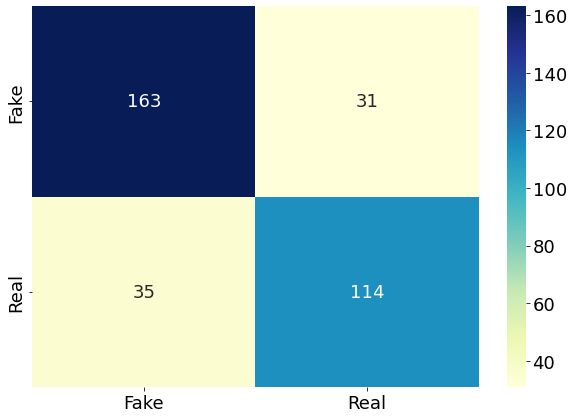

In [45]:
plt.figure(figsize=(10,7))
sns.heatmap(data=confusion_matrix(y_true=actual,y_pred=pred),
            xticklabels=class_names,
            yticklabels=class_names,
            annot=True,
            fmt=".4g",
            cmap="YlGnBu")
plt.show()

# Save the Model

In [46]:
model_structure = model.to_json()
f = Path("CNN_model/CNN_model_structure.json")
f.write_text(model_structure)

3376

In [47]:
model.save_weights("CNN_model/CNN_model_weights.h5")

# End...